# <font color='red'>Play Store Analysis</font> 

### Objective:-
Google Play Store team is about to launch a new feature where in certain apps that are promising are boosted in visibility. The boost will manifest in multiple ways – higher priority in recommendations sections (“Similar apps”, “You might also like”, “New and updated games”).These will also get a boost in visibility in search results. This feature will help bring more attention to newer apps that have potential. The task is to understand what makes an app perform well - size? price? category? multiple factors together? Analyze the data and present your insights in a format consumable by business – the final output of the analysis would be presented to business as insights with supporting data/visualizations.


### Import libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the dataset

In [2]:
Data = pd.read_csv("C:\\Users\\Sasi\\Desktop\\data science\\Python\\Project 1\\playstore-analysis.csv")

In [105]:
Data.rename(columns={"Content Rating" : "ContentRating"}, inplace = True) # Rename column name

### Understanding the Data

In [106]:
Data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver,BSize
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,1
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,1
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,1


In [4]:
Data.shape

(10841, 13)

### Data clean up – Missing value treatment

In [5]:
#Droping missimg values in Rating column
Data.dropna(how = 'any',subset = ["Rating"], inplace = True)

In [6]:
Data.shape

(9367, 13)

In [7]:
print("Total null values", Data.isnull().sum().sum())
Data.isnull().sum()

Total null values 8


App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    1
Genres           0
Last Updated     0
Current Ver      4
Android Ver      3
dtype: int64

In [8]:
Data.loc[Data["Android Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,ContentRating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
Data.drop([10472], axis=0,inplace = True)
Data.isnull().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
Last Updated     0
Current Ver      4
Android Ver      2
dtype: int64

In [10]:
value = str(Data["Android Ver"].mode())
Data["Android Ver"].fillna(value = value, inplace = True)
Data.isnull().sum()

App              0
Category         0
Rating           0
Reviews          0
Size             0
Installs         0
Type             0
Price            0
ContentRating    0
Genres           0
Last Updated     0
Current Ver      4
Android Ver      0
dtype: int64

In [11]:
value1 = Data["Current Ver"].mode()[0]
Data["Current Ver"].fillna(value = value1, inplace = True)
print("Total null values: ",Data.isnull().sum().sum())

Total null values:  0


### Data clean up – correcting the data types

In [12]:
numeric = Data.select_dtypes(include = np.number).columns
numeric

Index(['Rating', 'Size'], dtype='object')

In [13]:
Data.dtypes

App               object
Category          object
Rating           float64
Reviews           object
Size             float64
Installs          object
Type              object
Price             object
ContentRating     object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

### Correcting Price , Reviews , Install datatypes

In [14]:
#Price
Data["Price"] = Data["Price"].str.replace("$","")
Data["Price"] = Data["Price"].str.replace(",","")
Data["Price"] = Data["Price"].astype("float")

In [15]:
#Install
Data["Installs"] = Data["Installs"].str.replace("+","")
Data["Installs"] = Data["Installs"].str.replace(",","")
Data["Installs"] = Data["Installs"].astype("int")

In [16]:
#Reviews
Data["Reviews"] = Data["Reviews"].astype("int")

In [17]:
Data.dtypes

App               object
Category          object
Rating           float64
Reviews            int32
Size             float64
Installs           int32
Type              object
Price            float64
ContentRating     object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object

### Sanity checks – check for the following and handle accordingly

In [18]:
Data.drop(Data[Data.Rating >5 ].index, inplace = True)
Data.drop(Data[Data.Rating <1 ].index, inplace = True)
Data.shape

(9366, 13)

In [19]:
Data.drop(Data[Data.Reviews> Data.Installs].index, inplace =True)
Data.shape

(9359, 13)

### Identify and handle outliers

### Price

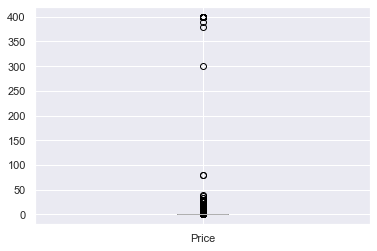

In [20]:

Data.boxplot("Price")
plt.show()

In [21]:
Data.drop(Data[Data.Price>200].index, inplace = True)
Data.shape

(9344, 13)

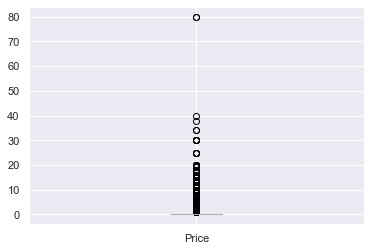

In [22]:
Data.boxplot("Price")
plt.show()

In [23]:
Data.drop(Data[Data.Price>30].index, inplace = True)
Data.shape

(9338, 13)

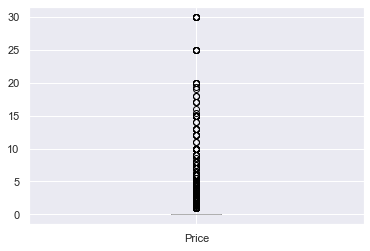

In [24]:
Data.boxplot("Price")
plt.show()

### Reviews

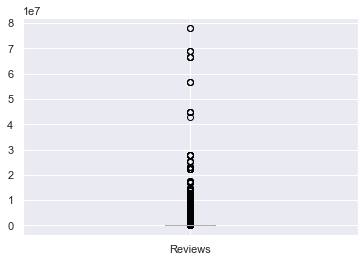

In [25]:
Data.boxplot("Reviews")
plt.show()

In [26]:
Data.drop(Data[Data.Reviews>1000000].index, inplace = True)
Data.shape

(8634, 13)

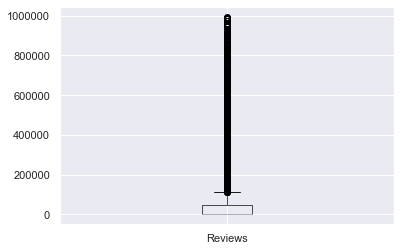

In [27]:
Data.boxplot("Reviews")
plt.show()

### Installs

In [28]:
percentail = np.percentile(Data["Installs"],95)
percentail
Data.shape

(8634, 13)

In [29]:
Data.drop(Data[Data.Installs> percentail].index,inplace = True)
Data.shape

(8435, 13)

### Data analysis to answer business questions

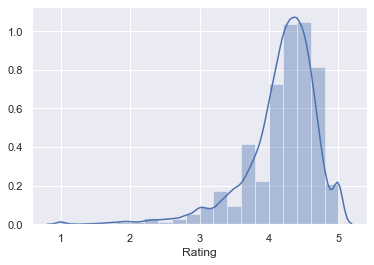

In [30]:
sns.distplot(Data['Rating'], bins=20)
plt.show()

Analysis:
Most of the apps are rated from 4-5 and we can observe the 1-3 very less rating to the apps
In 4-5 Most of the apps are good rating and maintain bug and gives more updates
In 3-4 rating apps should imporve thier content gives update
In 1-3 customers are not satisfied from these apps

### Top Content Rating values

In [31]:
Data["ContentRating"].value_counts()

Everyone           6782
Teen                900
Mature 17+          417
Everyone 10+        332
Adults only 18+       3
Unrated               1
Name: ContentRating, dtype: int64

In [32]:
Data.drop(Data[Data.ContentRating =="Unrated"].index, inplace = True)
Data.drop(Data[Data.ContentRating =="Adults only 18+"].index, inplace = True)

In [33]:
Data["ContentRating"].value_counts()

Everyone        6782
Teen             900
Mature 17+       417
Everyone 10+     332
Name: ContentRating, dtype: int64

### Effect of size on rating

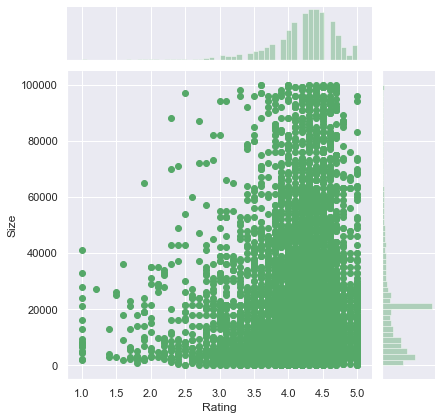

In [34]:
sns.jointplot(x ="Rating" , y = "Size" , data = Data ,kind = "scatter",color="g")
plt.show()

The correlation between size and rating is for 4-5 rating size is high
In Size the from zero to 20k has more rating
For low size has high rating 
pattern looks like right skewness
    

### Effect of price on rating

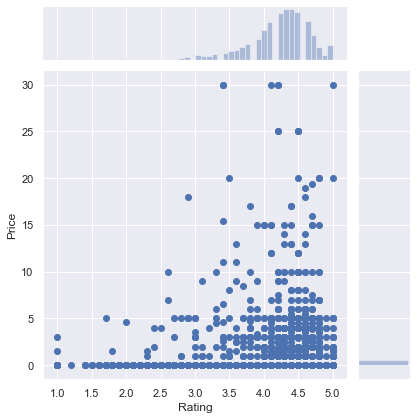

In [35]:
sns.jointplot(x ="Rating" , y = "Price" ,data = Data )
plt.show()

 In Joint plot Price and Rating are plotted
The free apps has good rating compared to the paid apps
For price above 0$ has 4-5 rating
The pattern looks like right skewness 

In [36]:
print(Data.shape)
Data.drop(Data[Data.Price>0].index,inplace = True)
print(Data.shape)

(8431, 13)
(7810, 13)


C:\Users\Sasi\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


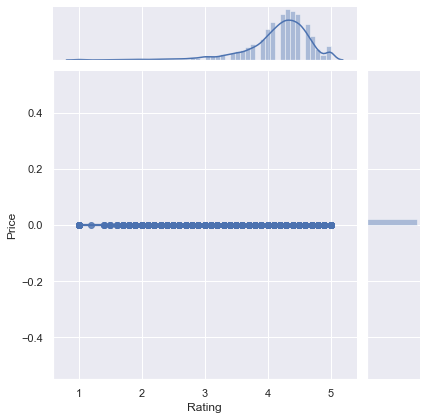

In [37]:
sns.jointplot(x ="Rating" , y = "Price" ,data = Data, kind = "reg" )
plt.show()

For Free apps the rating starts from 2.5 to 5
Pattern changes to straight line
from the  graph for free apps got 4-5 rating 
Overall infernce from price and rating is when price is 0 rating is high from 4-5
when price is greater than zero same as like price zero 
there is no much difference customer prefer free apps than paid apps

### Pairplot with Numerical Columns

In [38]:
numeric = Data.select_dtypes(include = np.number)
numeric

,Rating,Reviews,Size,Installs,Price
0,4.1,159,19000.000000,10000,0.0
1,3.9,967,14000.000000,500000,0.0
2,4.7,87510,8700.000000,5000000,0.0
4,4.3,967,2800.000000,100000,0.0
5,4.4,167,5600.000000,50000,0.0
...,...,...,...,...,...
10834,4.0,7,2600.000000,500,0.0
10836,4.5,38,53000.000000,5000,0.0
10837,5.0,4,3600.000000,100,0.0
10839,4.5,114,21516.529524,1000,0.0


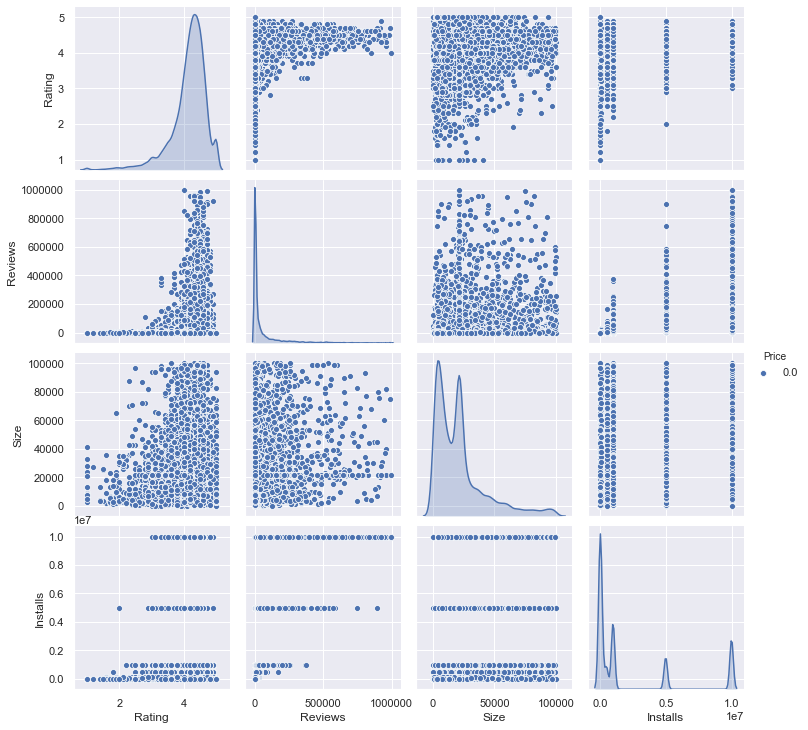

In [39]:
sns.pairplot(numeric, hue = "Price")
plt.show()

### Rating vs. content rating

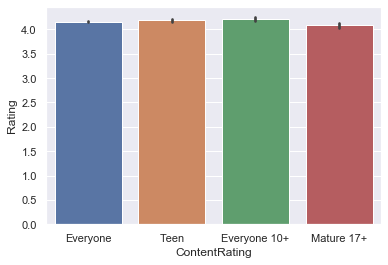

In [40]:
df.groupby(['Content Rating'])['Rating'].count().plot.bar(color="red")
plt.ylabel('Rating')
plt.show()

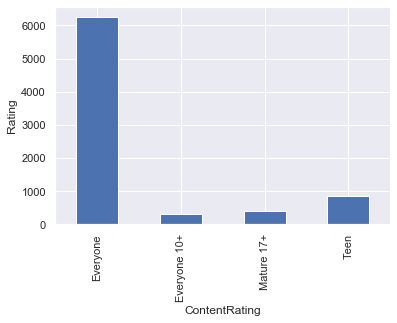

In [66]:
Data.groupby(['ContentRating'])['Rating'].count().plot.bar()
plt.ylabel('Rating')
plt.show()

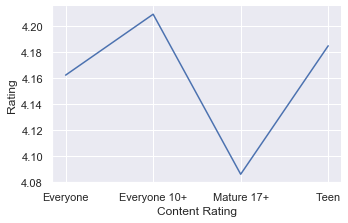

In [65]:
x = Data.groupby('ContentRating').Rating.mean()
x1 = x.index.tolist()
y1 = x.values.tolist()
sns.relplot(x1 ,y1 , data = Data, kind = "line").set(xlabel = "Content Rating", ylabel = "Rating")
plt.show()

### Creating 5 bucket based on Size

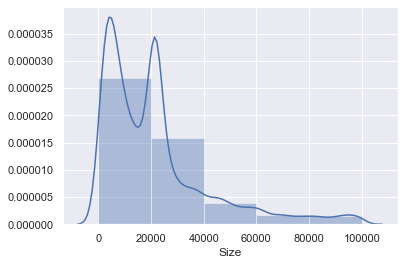

In [52]:
sns.distplot(Data["Size"], bins=5)
plt.show()

### Content Rating vs. Size buckets, get the rating (20th percentile) for each combination

In [121]:
bins=[0, 20000, 40000, 60000, 80000, 100000]
Data['Bucket Size'] = pd.cut(Data['Size'], bins, labels=['0-20k','20k-40k','40k-60k','60k-80k','80k-100k'])
D1=pd.pivot_table(Data, values='Rating', index='Bucket Size', columns='ContentRating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
D1

ContentRating,Everyone,Everyone 10+,Mature 17+,Teen
Bucket Size,,,,
0-20k,3.8,4.00,3.50,3.9
20k-40k,3.9,4.00,3.90,3.9
40k-60k,3.9,4.10,4.04,4.0
60k-80k,3.9,4.00,4.00,4.0
80k-100k,4.0,4.06,4.00,4.0


### Heat map

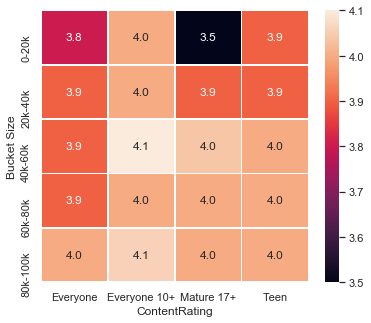

In [126]:
f,ax = plt.subplots(figsize=(6, 5))
sns.heatmap(D1, annot=True, linewidths=.8, fmt='1.1f',ax=ax)
plt.show()

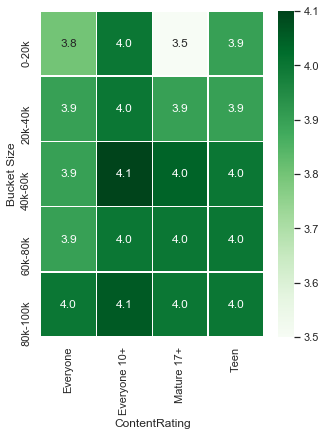

In [128]:
f,ax = plt.subplots(figsize=(5, 6))
sns.heatmap(D1, annot=True, linewidths=.5, cmap='Greens',fmt='1.1f',ax=ax)
plt.show()

Based on analysis, its not true that lighter apps are preferred in all categories.Because apps with size 40k-60k 
and 80k-100k have got the highest rating in all cateegories.So, in general we can conclude that heavier apps are
preferred in all categories.
